i:  0
0
80036.25289105155


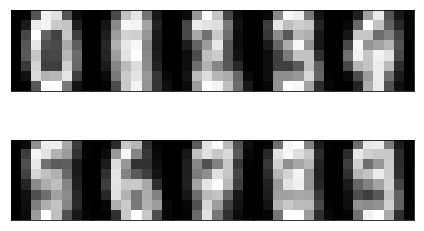

i:  1


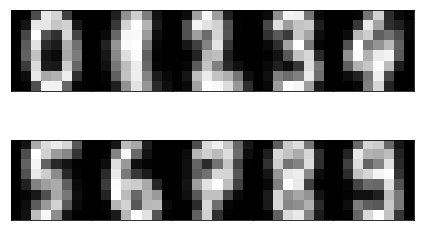

i:  2


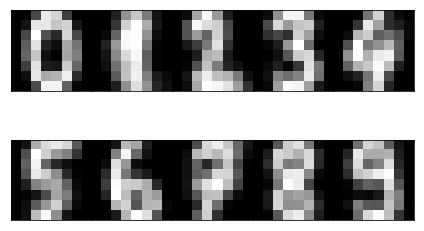

i:  3


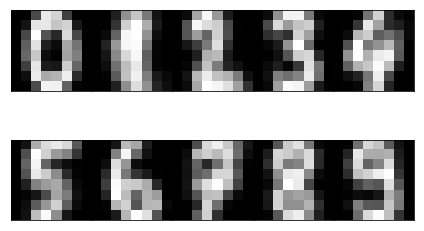

i:  4


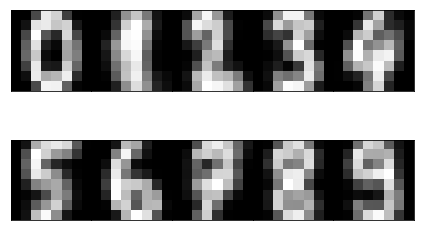

i:  5


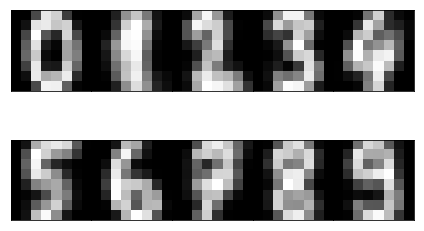

i:  6


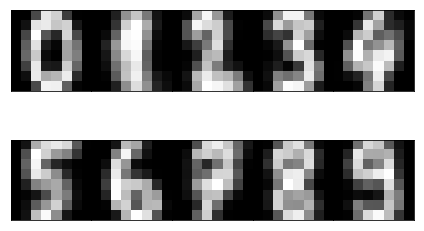

i:  7


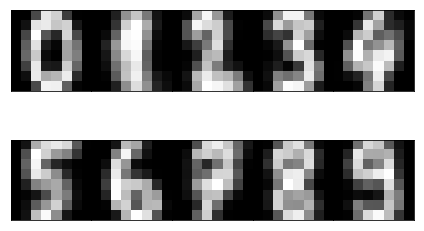

i:  8


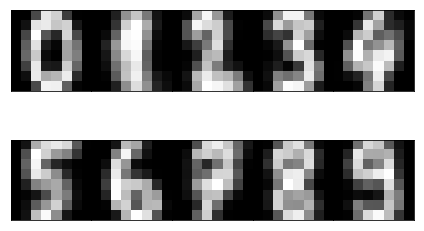

comp_score:  0.8780237394732961
fit done 9


In [2]:
from test_stuff import GMM
from sklearn import metrics, datasets

digits = datasets.load_digits()

num_examples = len(digits.data)
num_split = int(0.7 * num_examples)

train_features = digits.data[:num_split]
train_labels = digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

gmm = GMM()
gmm.fit(train_features, train_labels)


In [13]:
preds = gmm.predict(test_features)
pred_train = gmm.predict(train_features)

In [3]:
#experiment here
def repair(preds, labels):
    print("Classification report GBN:\n%s\n"
          % (metrics.classification_report(labels, preds)))
    
    print("Confusion matrix GBN:\n%s" % metrics.confusion_matrix(labels, preds))
    print()
    label_set = set(labels.copy())
    print(set(preds))


    for i in range(10):
        
        f1s = []
        

        print("old " ,preds[:20])

        for j in range(10):
            print(i , " > " , j)

            p_copy = list(preds.copy())
            switchero(i, j, p_copy)
            d = metrics.classification_report(labels, p_copy, output_dict = True)
            f1s.append(d[str(i)]['f1-score'])

            
        print(f1s)
        max_index = 0
        max_value = 0
        
        for fi in range(len(f1s)):
            if f1s[fi] > max_value and i in label_set:
                max_value = f1s[fi]
                max_index = fi

        print(max_value)
        
        if max_index in label_set:
            label_set.remove(max_index)
            
        if i in label_set:
            label_set.remove(i)

        
        print( i , " changed to " , max_index)
        print(label_set)
        if max_value is not 0:
            switchero(i, max_index, preds)
        print("new " ,preds[:20])
        
    
        print("Classification report GBN:\n%s\n"
          % (metrics.classification_report(labels, preds)))

        
    
    # for ci in range(len(f1s)):
    #    print(ci , " -> " , np.argmax(f1s[ci]))
    #    print(f1s[ci])
    #    class_mapping.append(np.argmax(f1s[ci]))
    #for c in f1s:
    #    print(c , " -> " , np.argmax(c))
    #    class_mapping.append(np.argmax(c))
    # for p in preds:
    #    p = class_mapping[p]
    # for pi in range(len(preds)):
    #    preds[pi] = class_mapping[preds[pi]]
        
    return preds

def switchero(a, b, in_list):

    for i in range(len(in_list)):
            if in_list[i] == a:
                in_list[i] = b
            elif in_list[i] == b:
                in_list[i] = a  


    return in_list


preds = gmm.predict(test_features)
pred_train = gmm.predict(train_features)
repaired_preds = repair(preds, test_labels)
repaired_train = repair(pred_train, train_labels)

print(set(repaired_preds))


Classification report GBN:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      0.96      0.96        53
           2       0.96      0.98      0.97        53
           3       0.98      0.81      0.89        53
           4       0.98      0.95      0.96        57
           5       0.87      0.80      0.83        56
           6       0.98      1.00      0.99        54
           7       0.87      1.00      0.93        54
           8       0.91      0.94      0.92        52
           9       0.81      0.87      0.84        55

    accuracy                           0.93       540
   macro avg       0.93      0.93      0.93       540
weighted avg       0.93      0.93      0.93       540


Confusion matrix GBN:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 51  1  0  0  0  0  0  1  0]
 [ 0  1 52  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  4  0  1  4  1]
 [ 0  0  0  0 54  0  0  3  0  0]
 [ 0  0  0  0  0 45  1  0 

In [5]:
import numpy as np

print("set", set(repaired_preds))


print("Test reports:")
print("Classification report GBN:\n%s\n"
          % (metrics.classification_report(test_labels, preds)))
    
print("Confusion matrix GBN:\n%s" % metrics.confusion_matrix(test_labels, preds))

set {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Test reports:
Classification report GBN:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      0.96      0.96        53
           2       0.96      0.98      0.97        53
           3       0.98      0.81      0.89        53
           4       0.98      0.95      0.96        57
           5       0.87      0.80      0.83        56
           6       0.98      1.00      0.99        54
           7       0.87      1.00      0.93        54
           8       0.91      0.94      0.92        52
           9       0.81      0.87      0.84        55

    accuracy                           0.93       540
   macro avg       0.93      0.93      0.93       540
weighted avg       0.93      0.93      0.93       540


Confusion matrix GBN:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 51  1  0  0  0  0  0  1  0]
 [ 0  1 52  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  4  0  1  4  1]
 [ 0  0  0

In [4]:

print("Training reports:")
print("Classification report GBN:\n%s\n"
          % (metrics.classification_report(train_labels, repaired_train)))
    
print("Confusion matrix GBN:\n%s" % metrics.confusion_matrix(train_labels, repaired_train))
print()


Training reports:
Classification report GBN:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       125
           1       0.95      0.86      0.90       129
           2       0.83      0.92      0.87       124
           3       0.97      0.95      0.96       130
           4       0.94      0.97      0.96       124
           5       0.96      0.86      0.90       126
           6       1.00      0.99      1.00       127
           7       0.89      1.00      0.94       125
           8       0.95      0.91      0.93       122
           9       0.85      0.83      0.84       125

    accuracy                           0.93      1257
   macro avg       0.93      0.93      0.93      1257
weighted avg       0.93      0.93      0.93      1257


Confusion matrix GBN:
[[125   0   0   0   0   0   0   0   0   0]
 [  0 111  17   0   1   0   0   0   0   0]
 [  0   5 114   0   0   0   0   1   4   0]
 [  0   0   2 124   0   2   0   2   0   0]
 

# K MEans

(1797, 64)
(1797,)
Accuracy
0.7935447968836951
Completeness
0.7514312243853245


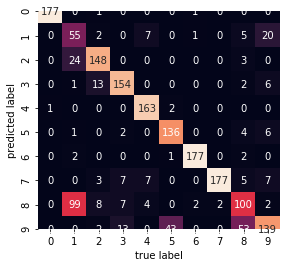

In [2]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, datasets
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import completeness_score



digits = load_digits()
print(digits.data.shape)
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

print(clusters.shape)

# fig, ax = plt.subplots(2, 5, figsize=(8, 3))
# centers = kmeans.cluster_centers_.reshape(10, 8, 8)
# for axi, center in zip(ax.flat, centers):
#     axi.set(xticks=[], yticks=[])
#     axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
#

labels = np.zeros_like(clusters)

for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

print("Accuracy")
print(accuracy_score(digits.target, labels))

print("Completeness")
print(completeness_score(digits.target, labels))

print("Classification report SKLearn MNIST GNB:\n%s\n"
          % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn MNIST GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))



mat = confusion_matrix(digits.target, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');

plt.show()
